In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

import random

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.head() #prints first 5 entries of the dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info() #result shows there are 10841 entries in the dataframe, it also lists the columns present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

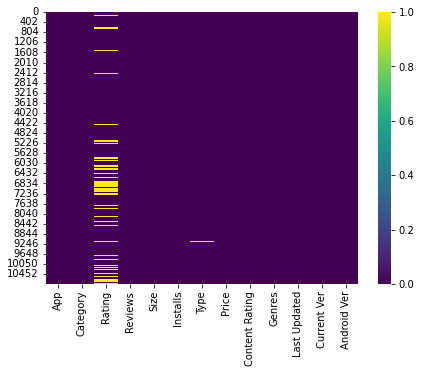

In [4]:
plt.figure(figsize=(7, 5))   
sns.heatmap(data.isnull(), cmap='viridis')      
data.isnull().any() #shows that Rating,Type,Content Rating,Current Ver and Android Ver cloumns have misisng value

In [5]:
data.isnull().sum() # shows the number of missing value in each column respectively

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
data['Rating'] = data['Rating'].fillna(data['Rating'].median()) 
#we replace the missing values of column Rating by the median of all Rating values

In [7]:
#we remove all the entries that have missing column values in Current Ver,Content Rating, Android Ver and Type
#we remove these entries corresponding to these columns as they have very few missing values
data = data[pd.notnull(data['Current Ver'])]
data = data[pd.notnull(data['Content Rating'])]
data = data[pd.notnull(data['Android Ver'])]
data = data[pd.notnull(data['Type'])]

In [8]:
data.isnull().sum() #to confirm that there are no further misisng values present

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
data.info() 
#we are left with 10829 entries now, out of 10841 (remaining are removed due to the presence of missing values)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


## Studying each colum attribute in detail and cleaning it

1. Size

In [10]:
#function to convert MB and KB in bytes
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

data["Size"] = data["Size"].map(change_size) #update the Size column with these new values

In [11]:
data.Size.fillna(method = 'ffill', inplace = True) #filling null values

Text(0, 0.5, 'Frequency')

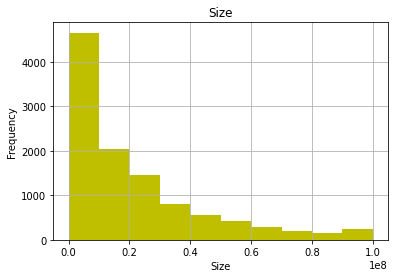

In [12]:
data.hist(column='Size', color='y') 
plt.xlabel('Size')
plt.ylabel('Frequency')

2. Split cells

In [13]:
data.Installs.value_counts()

1,000,000+        1578
10,000,000+       1252
100,000+          1169
10,000+           1052
1,000+             905
5,000,000+         752
100+               718
500,000+           538
50,000+            478
5,000+             476
100,000,000+       409
10+                385
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Name: Installs, dtype: int64

In [14]:
 #as linear regression deals with float values, we will remove any additional symbols present
data.Installs=data.Installs.apply(lambda x: x.strip('+'))  #remove symbol '+'
data.Installs=data.Installs.apply(lambda x: x.replace(',','')) #remove symbol ','

In [15]:
data['Installs'] = data['Installs'].astype(float)

In [16]:
data.Installs.value_counts()

1.000000e+06    1578
1.000000e+07    1252
1.000000e+05    1169
1.000000e+04    1052
1.000000e+03     905
5.000000e+06     752
1.000000e+02     718
5.000000e+05     538
5.000000e+04     478
5.000000e+03     476
1.000000e+08     409
1.000000e+01     385
5.000000e+02     330
5.000000e+07     289
5.000000e+01     205
5.000000e+00      82
5.000000e+08      72
1.000000e+00      67
1.000000e+09      58
0.000000e+00      14
Name: Installs, dtype: int64

3. Reviews

In [17]:
data.Reviews.str.isnumeric().sum() #checking if all 10829 Reviews are numeric values

10829

In [18]:
data['Reviews'] = data['Reviews'].astype(int) #converting 'object' type Reviews to type 'int'

4. Rating

In [19]:
#checking the range of the values of the Rating column
print("Range: ", data.Rating.min(),"-",data.Rating.max()) 

Range:  1.0 - 5.0


Text(0, 0.5, 'Frequency')

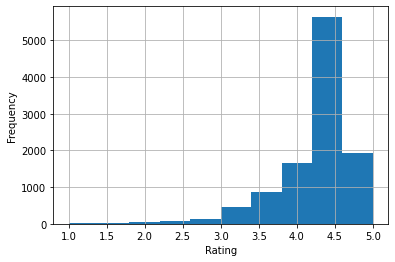

In [20]:
data.Rating.hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

5. Type

In [21]:
data.Type.value_counts() #Prints the number of Free and Paid app

Free    10032
Paid      797
Name: Type, dtype: int64

In [22]:
#Function that converts the Type value to '0' for free app and '1' for paid app
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

data['Type'] = data['Type'].map(type_cat) #updated type value

6. Price

In [23]:
data.Price=data.Price.apply(lambda x: x.strip('$'))  #removing the symbol '$'
data['Price'] = data['Price'].astype(float)

In [24]:
data.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

7. Category

<AxesSubplot:>

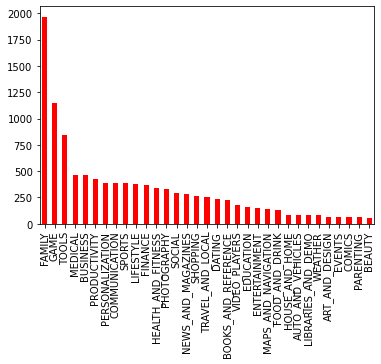

In [25]:
data.Category.value_counts().plot(kind='bar',color='r')

In [26]:
#giving discrete dummy values to discrete Categories and adding them in a new Column 'Category_new'
CategoryL = data.Category.unique()
CategoryDict = {}
for i in range(len(CategoryL)):
    CategoryDict[CategoryL[i]] = i
data['Category_new'] = data['Category'].map(CategoryDict).astype(int)

8. Content Rating

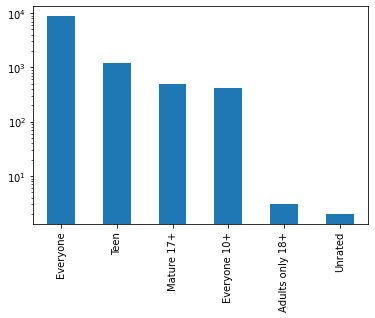

In [28]:
data.columns = data.columns.str.replace(' ', '_') #for ex: replacing column name 'Content Rating' with 'Content_Rating'
data.Content_Rating.value_counts().plot(kind='bar')
plt.yscale('log')

In [29]:
#giving discrete dummy values to discrete Content Rating and updating them in the column
RatingL = data['Content_Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
data['Content_Rating'] = data['Content_Rating'].map(RatingDict).astype(int)

9. Genres

In [30]:
#giving discrete dummy values to discrete Genres and adding them in a new Column 'Genre_new'
GenresL = data.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
data['Genres_new'] = data['Genres'].map(GenresDict).astype(int)

10. Remaining

In [31]:
#dropping the columns that are not relevant for our linear regression
data.drop(labels = ['Last_Updated','Current_Ver','Android_Ver','App'], axis = 1, inplace = True)

### Final Database

In [32]:
data.head() #first 5 entries of the updated dataframe

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Category_new,Genres_new
0,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,0,0.0,0,Art & Design;Creativity,0,2


In [33]:
data.info() #checking if all the fields except 'Category' and 'Genres' are of either 'int64' or 'float64' type for regression

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10829 non-null  object 
 1   Rating          10829 non-null  float64
 2   Reviews         10829 non-null  int32  
 3   Size            10829 non-null  float64
 4   Installs        10829 non-null  float64
 5   Type            10829 non-null  int64  
 6   Price           10829 non-null  float64
 7   Content_Rating  10829 non-null  int32  
 8   Genres          10829 non-null  object 
 9   Category_new    10829 non-null  int32  
 10  Genres_new      10829 non-null  int32  
dtypes: float64(4), int32(4), int64(1), object(2)
memory usage: 846.0+ KB


## **Linear Regression Model Building**